Dataset shape: (178, 14)
Columns: Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')
Target variable classes: ['class_0' 'class_1' 'class_2']


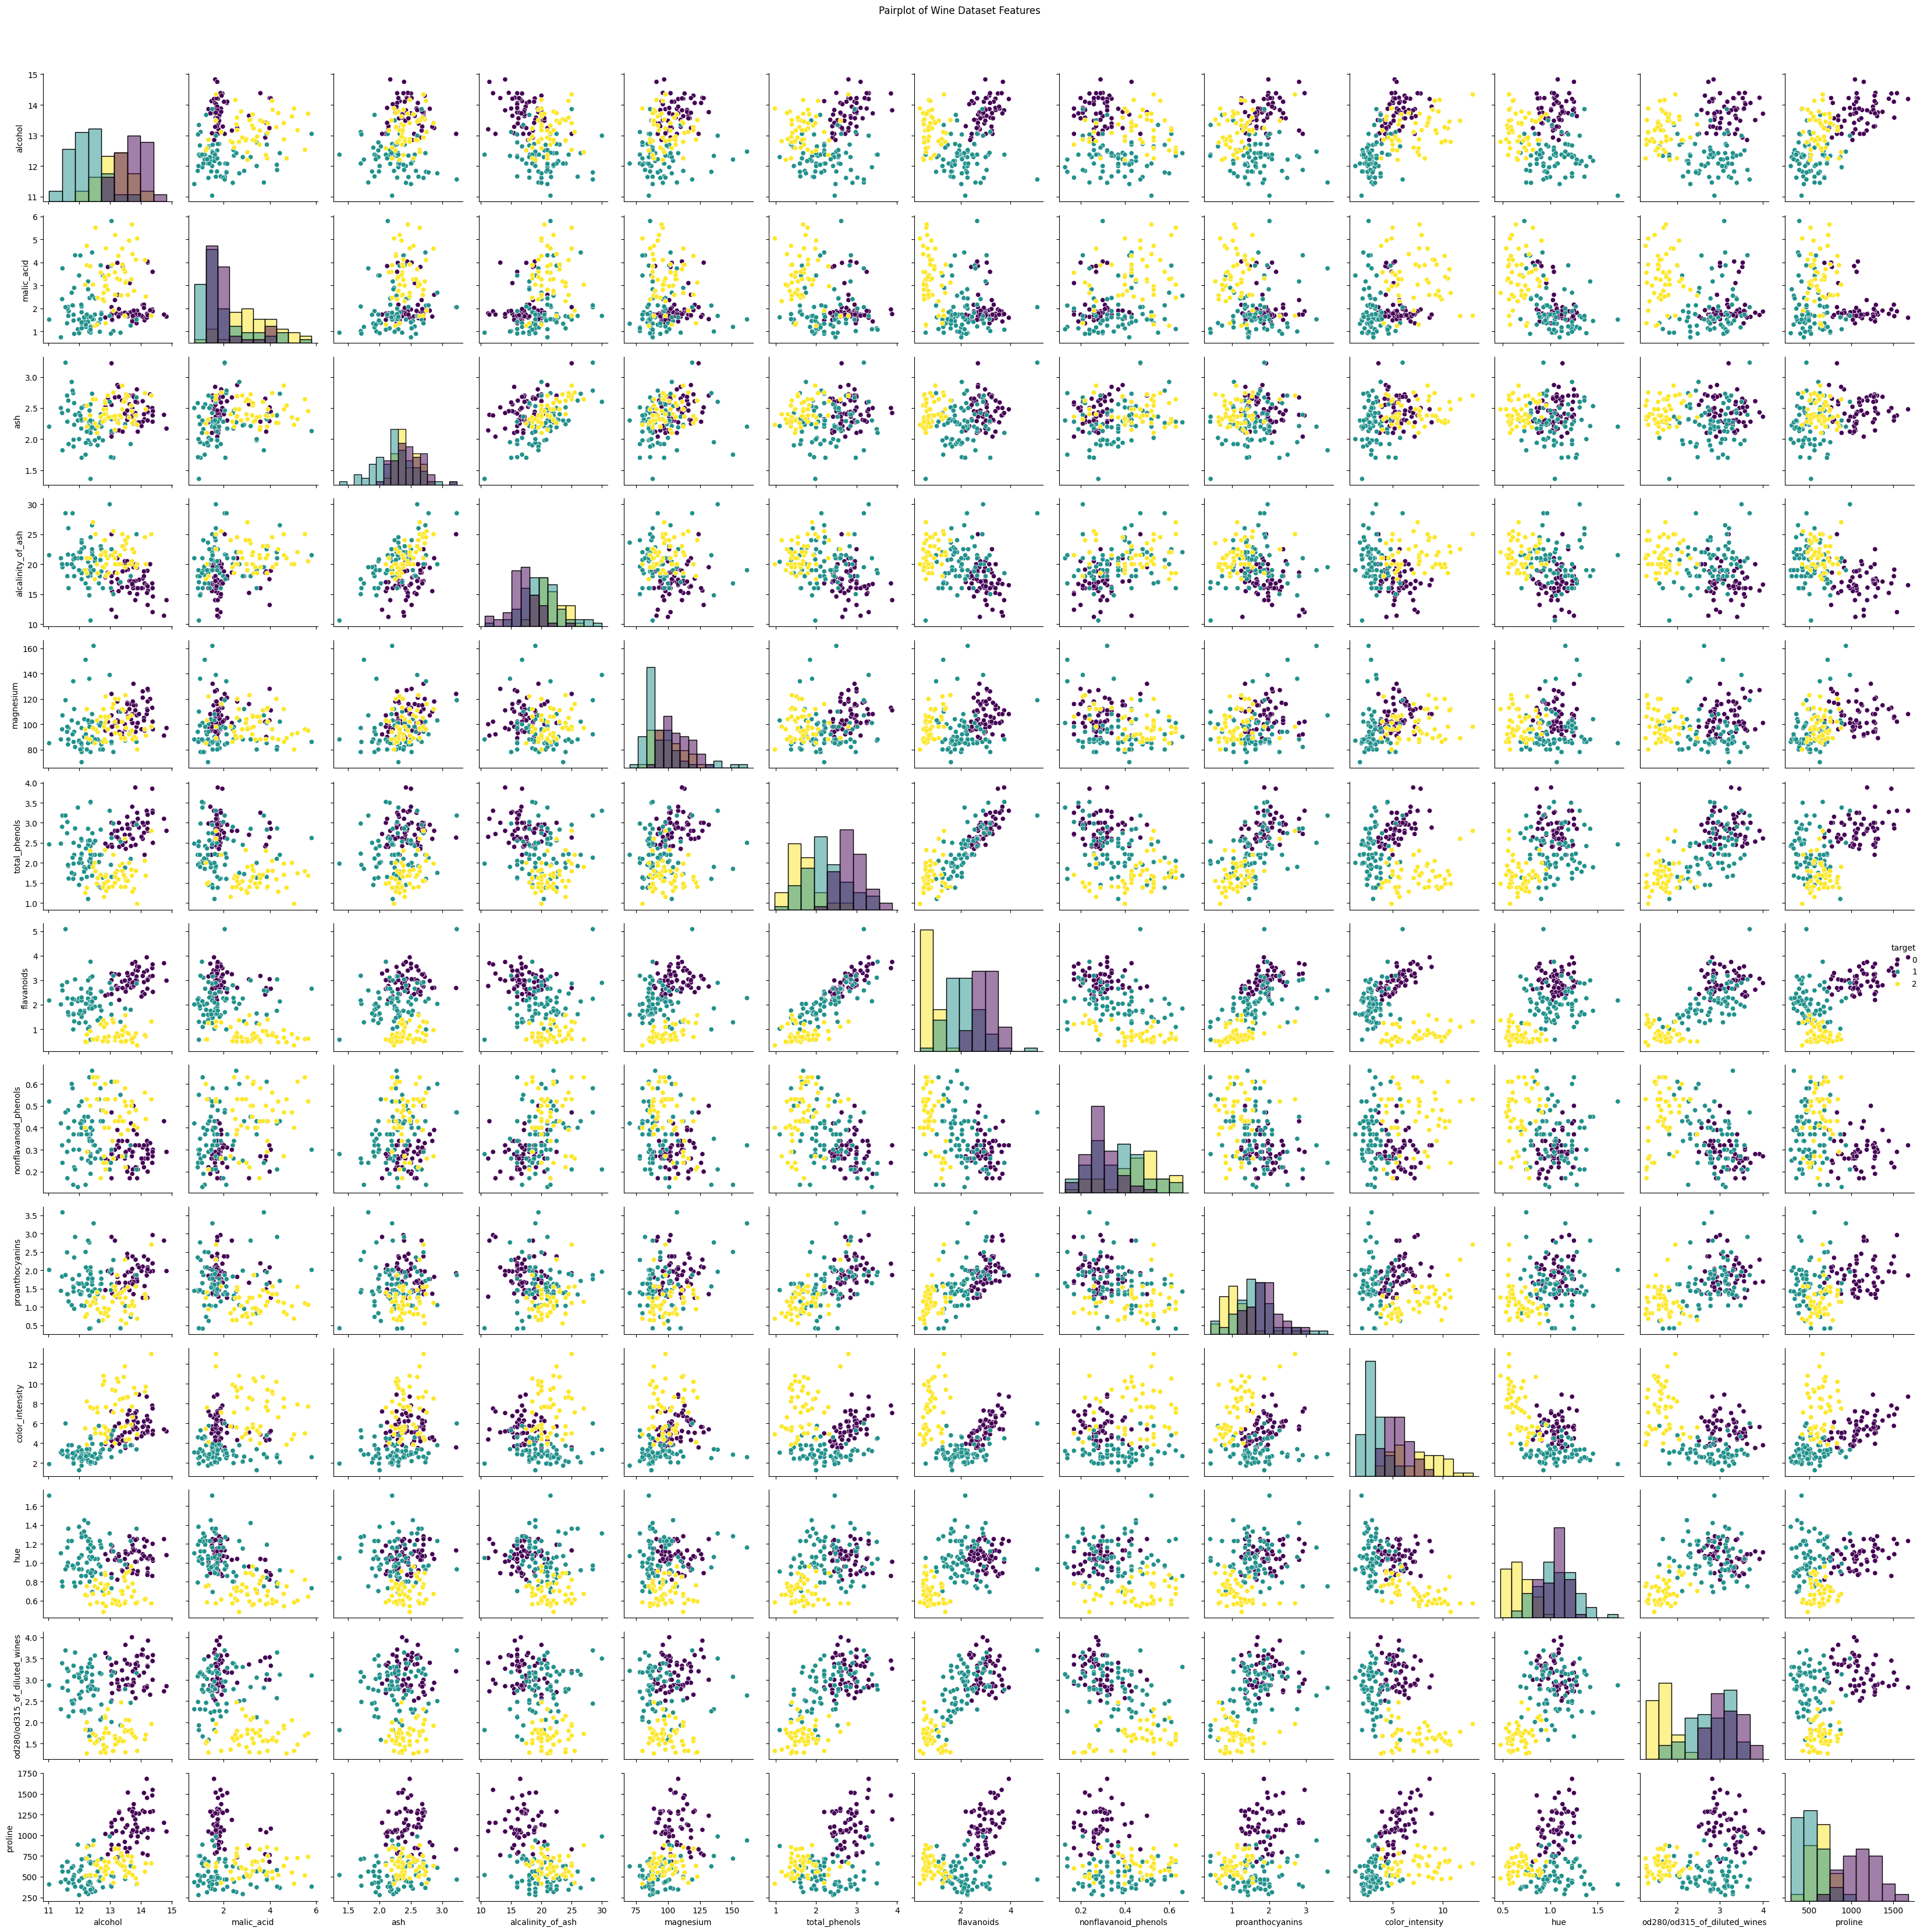

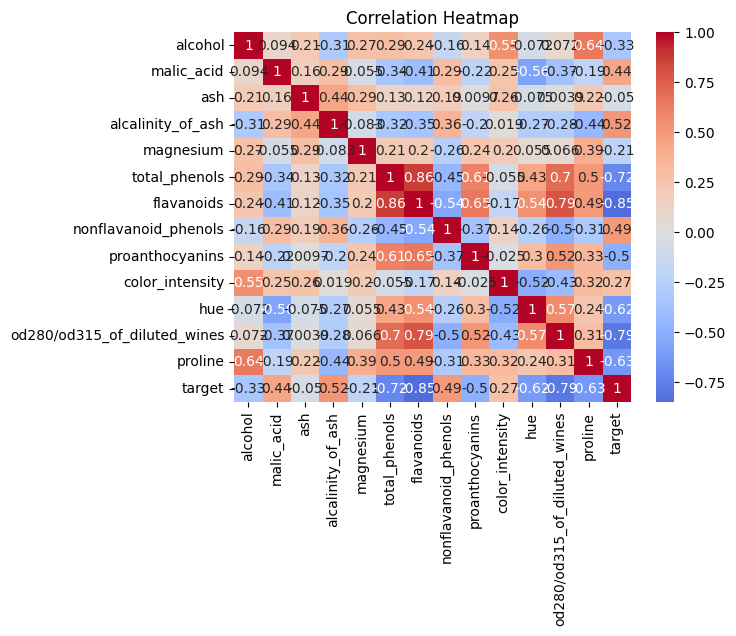

Best parameters: {'var_smoothing': 1e-09}
Best cross-validation score (accuracy): 0.9645320197044335

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [7]:
# Import necessary libraries
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Convert data to DataFrame for easier analysis
df = pd.DataFrame(data=X, columns=wine.feature_names)
df['target'] = y

# Display basic statistics and information
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns}")
print(f"Target variable classes: {wine.target_names}")

# Pairplot for visualizing relationships and distributions
sns.pairplot(df, diag_kind='hist', hue='target', palette='viridis')
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.tight_layout()
plt.show()

# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
nb = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score (accuracy): {grid_search.best_score_}")

# Predict and evaluate with best model
best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))
